In [31]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

### Fixed Cost of each WTP

In [32]:
WTP = ['Ampang Intake', 'Batang Kali', 'Bernam River Head', 'WTP1', 'WTP2',
       'WTP3', 'WTP4', 'WTP5', 'WTP6', 'WTP7', 'WTP8', 'WTP9', 'WTP10',
       'WTP11', 'WTP12', 'WTP13', 'WTP14', 'WTP15', 'WTP16', 'WTP17', 'WTP18',
       'WTP19', 'WTP20', 'WTP21', 'WTP22', 'WTP23', 'WTP24', 'WTP25', 'WTP26',
       'WTP27', 'WTP28', 'WTP29', 'WTP30', 'WTP31', 'WTP32', 'WTP33', 'WTP34',
       'WTP35', 'WTP36', 'WTP37', 'WTP38', 'WTP39', 'WTP40', 'Wangsa Maju',
       'Sungai Tengi']
len(WTP)

45

In [33]:
DMZ = np.array(["DMZ"+ "{:03d}".format(x) for x in range(1, 2501)])

In [34]:
DMZ

array(['DMZ001', 'DMZ002', 'DMZ003', ..., 'DMZ2498', 'DMZ2499', 'DMZ2500'],
      dtype='<U7')

In [35]:
len(DMZ)

2500

In [36]:
fixed_cost = pd.DataFrame()
fixed_cost["WTP"] = WTP
fixed_cost = fixed_cost.set_index("WTP")

In [37]:
fixed_cost["Fixed Cost"] = np.random.randint(low=4000, high=12000, size=len(fixed_cost.index))

In [38]:
# fixed_cost.to_excel("../dataset2/fixed_cost.xlsx", index=True)
fixed_cost = pd.read_excel("../dataset2/fixed_cost.xlsx")

Text(0.5, 1.0, 'Distribution of WTP Fixed Cost')

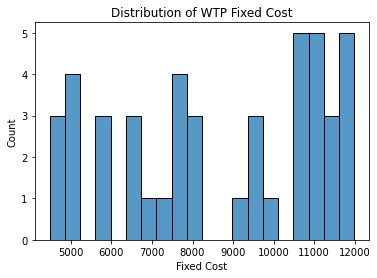

In [39]:
sns.histplot(x="Fixed Cost", data=fixed_cost, bins=20)
plt.title("Distribution of WTP Fixed Cost")

### Capacity of each WTP

In [40]:
# # With uniform distribution
# wtp_capacity = np.random.randint(low = 1750000, high=4000000, size=len(WTP))
# new_capacity = pd.DataFrame({"Capacity": wtp_capacity}, index=WTP)

In [41]:
# With norm distribution

# Parameters of the distribution
lower, upper = 17500000, 40000000
mu, sigma = 28000000, 1000000

# Creating the distribution generator
capacity_generator = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc = mu, scale=sigma, 
)
capacity= capacity_generator.rvs(size=len(WTP))
new_capacity = pd.DataFrame({"Capacity": capacity}, index=WTP)
new_capacity = new_capacity.round(5)

In [42]:
# new_capacity.to_excel("../dataset2/capacity.xlsx")
new_capacity = pd.read_excel("../dataset2/capacity.xlsx")

C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


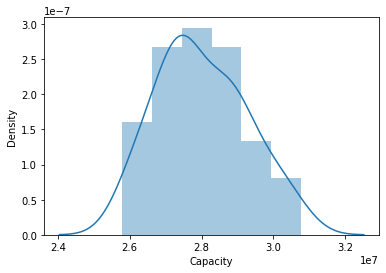

In [43]:
sns.distplot(new_capacity["Capacity"])

Text(0.5, 1.0, 'Distribution of WTP Capacity')

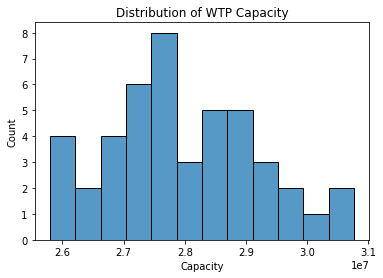

In [44]:
sns.histplot(new_capacity["Capacity"], bins = 12)
plt.title("Distribution of WTP Capacity")

### Distribution Loss

In [45]:
# Parameters of the distribution
lower, upper = 0.23, 0.36
mu, sigma = 0.30, 0.035

# Creating the distribution generator
loss_generator = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc = mu, scale=sigma, 
)
loss = loss_generator.rvs(size=(len(DMZ), len(WTP)))

In [46]:
new_distribution_loss = pd.DataFrame(loss,columns=WTP, index=DMZ)
new_distribution_loss = new_distribution_loss.round(5)

In [47]:
temp = np.array(loss)
water_loss = temp.flatten()

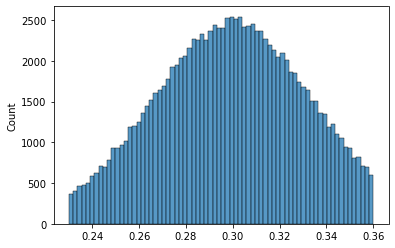

In [48]:
sns.histplot(water_loss)

In [49]:
new_distribution_loss

,Ampang Intake,Batang Kali,Bernam River Head,WTP1,WTP2,WTP3,WTP4,WTP5,WTP6,WTP7,...,WTP33,WTP34,WTP35,WTP36,WTP37,WTP38,WTP39,WTP40,Wangsa Maju,Sungai Tengi
DMZ001,0.33190,0.27310,0.30739,0.31810,0.28199,0.34103,0.33171,0.31258,0.30845,0.28090,...,0.29203,0.26562,0.32777,0.27292,0.34343,0.31017,0.26388,0.27863,0.29751,0.30977
DMZ002,0.29564,0.28511,0.31517,0.28043,0.26065,0.29217,0.25282,0.32846,0.30850,0.28689,...,0.35743,0.30059,0.24931,0.24788,0.27385,0.28677,0.33713,0.27487,0.30182,0.26880
DMZ003,0.33296,0.32869,0.28515,0.30909,0.24686,0.28264,0.26625,0.26022,0.35351,0.28449,...,0.31841,0.27442,0.28504,0.29959,0.26834,0.29392,0.29510,0.32657,0.30794,0.26735
DMZ004,0.28693,0.27764,0.29962,0.35858,0.29187,0.30769,0.33187,0.30605,0.28798,0.29495,...,0.30500,0.28788,0.35705,0.34698,0.32018,0.32079,0.26921,0.25816,0.32493,0.30548
DMZ005,0.32684,0.32456,0.30054,0.33183,0.34071,0.24720,0.28271,0.35685,0.29318,0.26213,...,0.27989,0.28610,0.35825,0.29667,0.29980,0.25853,0.27726,0.28146,0.28089,0.29678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMZ2496,0.32782,0.25197,0.34419,0.24926,0.33083,0.30400,0.25810,0.31087,0.31550,0.29457,...,0.32533,0.23700,0.32370,0.33809,0.29354,0.28209,0.32426,0.26880,0.29726,0.34589
DMZ2497,0.26360,0.26264,0.27090,0.30550,0.26362,0.30941,0.31378,0.27638,0.32204,0.32200,...,0.33319,0.28233,0.30864,0.25474,0.24413,0.33722,0.30636,0.26875,0.30736,0.33342
DMZ2498,0.33260,0.31594,0.35566,0.26404,0.27987,0.23330,0.30164,0.25385,0.29875,0.28676,...,0.27416,0.25716,0.33807,0.31501,0.29097,0.29462,0.31096,0.34249,0.25780,0.32819
DMZ2499,0.25213,0.28952,0.29301,0.33443,0.30585,0.25961,0.31473,0.28464,0.31680,0.29639,...,0.25072,0.28902,0.27620,0.30378,0.29521,0.30590,0.32510,0.31337,0.35658,0.32508


In [50]:
# Exporting
# new_distribution_loss.to_excel("../dataset2/distribution_loss.xlsx")

# Importing
new_distribution_loss = pd.read_excel("../dataset2/distribution_loss.xlsx", index_col=0)

Text(0.5, 1.0, 'Distribution of Water Loss')

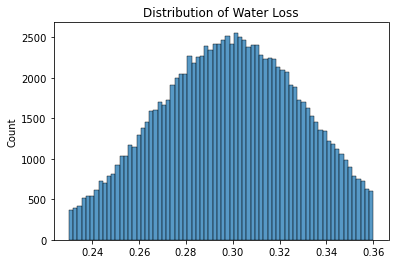

In [51]:
temp=new_distribution_loss.values
water_loss = temp.flatten()
sns.histplot(water_loss)
plt.title("Distribution of Water Loss")

### Links between WTP and DMZ

In [52]:
# Parameters of the distribution
probability_have_connection = 0.9

# Creating the linkages
connection = np.random.choice([0, 1], size=(len(DMZ), len(WTP)), p=[1-probability_have_connection, probability_have_connection])

In [53]:
new_linkage = pd.DataFrame(connection, columns=WTP, index=DMZ)

In [54]:
# Exporting
# new_linkage.to_excel("../dataset2/linkage2.xlsx")


# Importing
new_linkage = pd.read_excel("../dataset2/linkage2.xlsx", index_col=0)

C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bar Chart of Linkages')

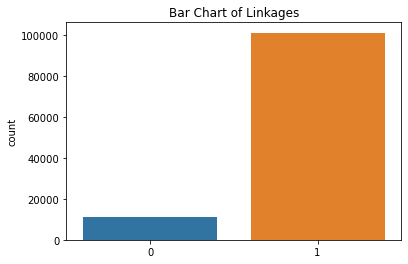

In [55]:
temp=new_linkage.values
# temp = loss
# temp = np.array(loss)
temp = temp.flatten()
sns.countplot(temp)
plt.title("Bar Chart of Linkages")

### Variable Cost for each combination of (DMZ, WTP)

In [56]:
variable_cost = pd.read_excel("../dataset/variable_costs.xlsx", index_col=0)
variable_cost.head()

,Ampang Intake,Batang Kali,Bernam River Head,Wangsa Maju,Sungai Tengi
Variable Costs,,,,,
DMZ1,12,12,12,12,12
DMZ2,13,13,13,13,13
DMZ3,10,10,10,10,10
DMZ4,8,8,8,8,8
DMZ5,5,5,5,5,5


In [57]:
# Parameters of the distribution
lowest_val = 5
highest_val = 25

vc =np.random.randint(low=lowest_val, high=highest_val, size=(len(DMZ), len(WTP)))

In [58]:
new_variable_cost = pd.DataFrame(vc,columns=WTP, index=DMZ)

In [59]:
new_variable_cost

,Ampang Intake,Batang Kali,Bernam River Head,WTP1,WTP2,WTP3,WTP4,WTP5,WTP6,WTP7,...,WTP33,WTP34,WTP35,WTP36,WTP37,WTP38,WTP39,WTP40,Wangsa Maju,Sungai Tengi
DMZ001,5,24,10,20,6,12,17,17,13,17,...,22,9,16,17,13,11,11,17,23,18
DMZ002,8,19,7,16,13,8,21,18,15,10,...,20,11,22,10,24,19,24,7,18,16
DMZ003,24,9,22,10,14,5,15,22,16,9,...,19,7,11,5,8,11,16,22,13,15
DMZ004,11,13,7,7,18,22,10,8,9,5,...,11,10,19,5,21,18,5,13,13,13
DMZ005,13,11,16,13,21,10,21,20,10,10,...,22,10,8,21,7,9,15,22,18,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMZ2496,6,18,8,10,12,8,13,15,18,12,...,21,10,10,15,13,13,19,20,5,17
DMZ2497,20,9,13,13,6,21,21,15,16,21,...,13,17,7,14,21,14,10,5,20,24
DMZ2498,21,7,24,20,14,18,22,19,7,18,...,5,21,5,8,16,10,10,17,13,22
DMZ2499,5,11,10,15,5,8,7,22,18,6,...,16,11,12,18,8,21,8,12,17,22


In [60]:
# Exporting
# new_variable_cost.to_excel("../dataset2/variable_costs.xlsx")

# Importing
new_variable_cost = pd.read_excel("../dataset2/variable_costs.xlsx", index_col=0)


Text(0.5, 1.0, 'Distribution of Variable Cost')

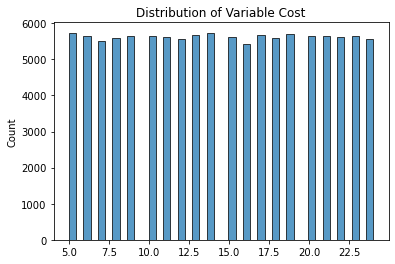

In [61]:
temp=new_variable_cost.values
# temp = loss
# temp = np.array(loss)
temp = temp.flatten()
sns.histplot(temp)
plt.title("Distribution of Variable Cost")

### Transport Cost for each combination of (DMZ, WTP)

No transport cost was generated and used for the optimisation 

In [62]:
# transport_cost = pd.read_excel("../dataset/freight_costs.xlsx", index_col=0)
# transport_cost.head()

### Demand for each DMZ

C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


165000.0 800000000.0 1.4142135623730951 3.0


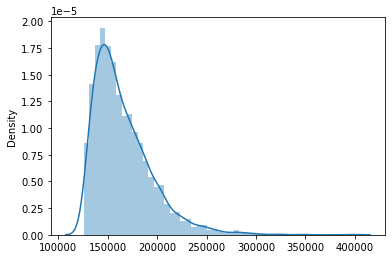

In [63]:
# Using Chi-squared distribution

# Parameters of the distribution
df = 4        # Degree of freedom. Controls the skewness
loc=125000    # Amount to shift the location of the distribution
scale=10000   # Scale the distribution

demand= stats.chi2.rvs(df, size=len(DMZ), loc=loc, scale=scale)

temp = np.array(demand).flatten()
sns.distplot(temp)

mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk', loc=loc, scale=scale)

print(mean, var, skew, kurt)

In [64]:
# new_demand = pd.DataFrame(demand, index=DMZ, columns=["Demand"])
# new_demand = new_demand.round(5)

# # Exporting
# new_demand.to_excel("../dataset2/demand_chisq.xlsx")


C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


161941.76058678058 82394354.08801413 0.9772874682383684 0.8482995754166126


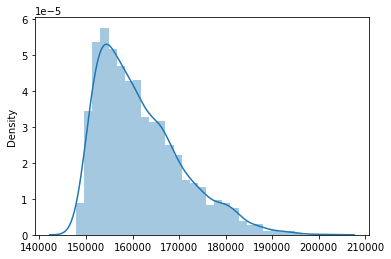

In [65]:
# Using Skew norm

# Parameters of the distribution
a = 15        # Skewness of the distribution. In this case, it is positvely skewed
loc=150000    # Amount to shift the location of the distribution
scale=15000   # Scale the distribution

demand= stats.skewnorm.rvs(a, size=len(DMZ), loc=loc, scale=scale)

temp = np.array(demand).flatten()
sns.distplot(temp)

mean, var, skew, kurt =  stats.skewnorm.stats(a, moments='mvsk', loc=loc, scale=scale)

print(mean, var, skew, kurt)

In [66]:
# new_demand = pd.DataFrame(demand, index=DMZ, columns=["Demand"])
# new_demand = new_demand.round(5)

# # Exporting
# new_demand.to_excel("../dataset2/demand_skewnorm.xlsx")

In [67]:
# Importing
new_demand = pd.read_excel("../dataset2/demand_chisq.xlsx", index_col=0)
# new_demand = pd.read_excel("../dataset2/demand_skewnorm.xlsx")


C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of DMZ Demand')

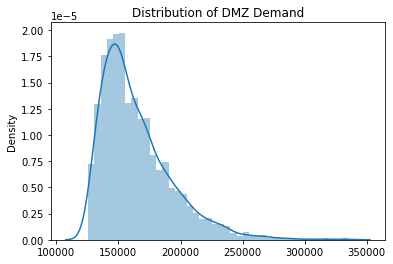

In [68]:
temp = new_demand.values
temp = temp.flatten()
sns.distplot(temp)
plt.title("Distribution of DMZ Demand")